# Exploring correlation between variables
## Segment 5 - Delving into non-parametric methods using pandas and scipy

### Spearmans Rank Correlation
#### Description
Finds the R correlation between variable pairs or ordinal data types (catagorical data). Variable pairs can then be ranked based on the strength og the correlation between them

* R = 1 indicates strong positive correlation
* R = 0 indicates no correlation
* R = -1 indicates strong negative correlation

#### Assumptions
* Variables are ordinal (catagorical)
* Variables are related non-linearly
* Data is not normaly distributed

### Chi-Square
#### Descrition
Determines if variables are indipendant of one another (no significant relationship between them)

#### Null Hypothesis
The null hypothesis is what Chi-Square tests against (to determine if you shpould accept or reject it). The null hypothesis is always that there is no significant correlation between the data

* p < 0.05 indicates that you should reject the null hypothesis and that there is a correlation between the variables
* p > 0.05 indicated that you should accept the null hypothesis and that there is no signifcant correlation between the data

#### Assumptions
* Variables are categoric or numerical
* Numerical values have been binned\*

\* Binning is where you place numerical values into 'bins' i.e. grouping all values between 1-10, 11-20, 21-30 etc.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy

from matplotlib import pyplot
from pylab import rcParams
from scipy.stats import spearmanr

In [2]:
cars = pd.read_csv('./mtcars.csv')
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### The Spearman Rank Correlation

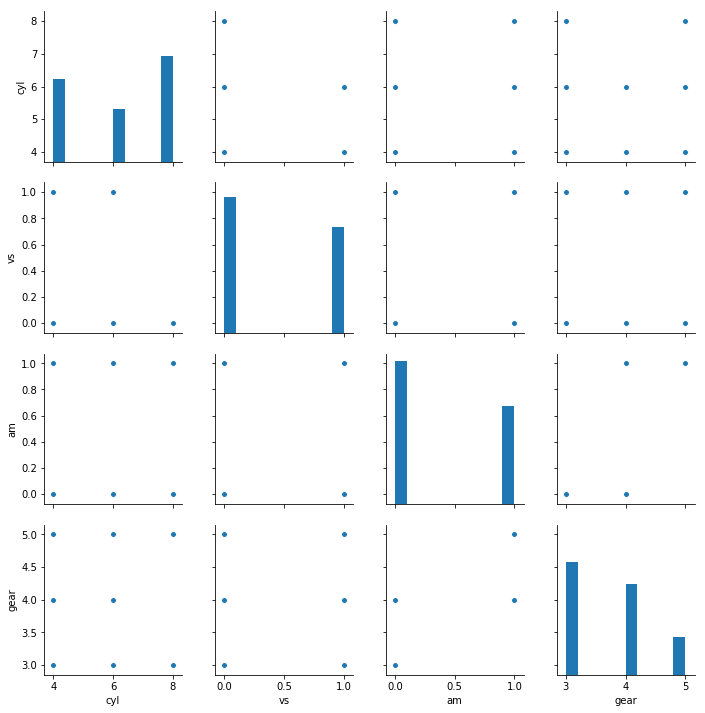

In [3]:
data = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(data)

In [4]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gears = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print(f"Spearman coefficient is {spearmanr_coefficient:.2f}, p value is {p_value}")

Spearman coefficient is -0.81, p value is 1.4840576453926875e-08


In [5]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print(f"Spearman coefficient is {spearmanr_coefficient:.2f}, p value is {p_value}")

Spearman coefficient is -0.52, p value is 0.0021780464381859484


In [6]:
spearmanr_coefficient, p_value = spearmanr(cyl, gears)
print(f"Spearman coefficient is {spearmanr_coefficient:.2f}, p value is {p_value}")

Spearman coefficient is -0.56, p value is 0.0007678208835711609


### Chi-square test for independence

In [7]:
# p value is less than 0.05 so we reject the null hypothesis and conclude that the variables are corelated 

table = pd.crosstab(cyl,vs)
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(table.values)

print(f"Chi squared is {chi2}, p value is {p_value}, degrees of freedom is {dof}")

Chi squared is 21.339929911358485, p value is 2.3232347637946903e-05, degrees of freedom is 2


In [8]:
# p value is less than 0.05 so we reject the null hypothesis and conclude that the variables are corelated 

table = pd.crosstab(cyl,am)
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(table.values)

print(f"Chi squared is {chi2}, p value is {p_value}, degrees of freedom is {dof}")

Chi squared is 8.740732951259268, p value is 0.012646605046107276, degrees of freedom is 2


In [9]:
# p value is less than 0.05 so we reject the null hypothesis and conclude that the variables are corelated 

table = pd.crosstab(cyl,gears)
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(table.values)

print(f"Chi squared is {chi2}, p value is {p_value}, degrees of freedom is {dof}")

Chi squared is 18.03636363636364, p value is 0.0012140660337851554, degrees of freedom is 4
